## Useful Gaussian Identities

#### Density Function
$$
\begin{eqnarray*}
f(x) &=& N(\mu,\Sigma)\\
& = & (2\pi)^{-\frac{d}{2}} \det(\Sigma)^{-\frac{1}{2}} \exp\left[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \right]
\end{eqnarray*}
$$
Or in log form
$$
\log f(x) = -\frac{d}{2}\log(2\pi) - \frac{1}{2} \log\det(\Sigma) -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) 
$$

#### Linear Transformations
$$
X\sim N(\mu,\Sigma) \quad \Rightarrow \quad (AX+b)\sim N(A\mu + b, A\Sigma A^T)
$$

#### Block Definition of Joint Density
$$
\begin{eqnarray*}
f(x,y) = N\left(\left[\begin{array}{c}\mu_x\\ \mu_y\end{array}\right], \left[\begin{array}{cc}\Sigma_{xx} & \Sigma_{xy}\\ \Sigma_{xy}^T & \Sigma_{yy} \end{array}\right]\right)
\end{eqnarray*}
$$

#### Marginal Distributions
$$
\begin{eqnarray*}
f(x) = \int_{\Omega_y} f(x,y) dy = N(\mu_x, \Sigma_{xx})\\
\end{eqnarray*}
$$

#### Conditional Distributions
$$
f(x|y=\bar{y}) = N\left(\mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(\bar{y}-\mu_y), \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{xy}^T \right)
$$


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
sigma = np.array([[1.0, 0.5],
                  [0.5, 2.0]])
print(sigma)

[[1.  0.5]
 [0.5 2. ]]


In [6]:
print(sigma-sigma.T)

[[0. 0.]
 [0. 0.]]


In [7]:
mu = np.ones(2)
print(mu)

[1. 1.]


In [8]:
x = np.array([0.1, 0.2])

In [9]:
print(x)

[0.1 0.2]


$$
\log f(x) = -\frac{d}{2}\log(2\pi) - \frac{1}{2} \log\det(\Sigma) -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) 
$$

In [13]:
d = mu.shape[0]
part1 = -0.5*d * np.log(2.0*np.pi)

# det = np.linalg.det(sigma)
sign, log_det = np.linalg.slogdet(sigma)
part2 = -0.5 * log_det

part3 = -0.5 * (x - mu).T @ np.linalg.solve(sigma, x-mu)

log_pdf = part1 + part2 + part3
print(log_pdf)

-2.5576849603770566


In [17]:
def LogGaussianDensity(x, mean, cov):
    
    d = mean.shape[0]
    part1 = -0.5*d * np.log(2.0*np.pi)

    # det = np.linalg.det(sigma)
    sign, log_det = np.linalg.slogdet(cov)
    part2 = -0.5 * log_det

    part3 = -0.5 * (x - mean).T @ np.linalg.solve(cov, x-mean)

    log_pdf = part1 + part2 + part3
    
    return log_pdf
    

In [18]:
print( LogGaussianDensity(x, mu, sigma))

-2.5576849603770566


## Use Matplotlib to plot density

In [19]:
N = 80
x1s = np.linspace(-3,3,N)
x2s = np.linspace(-4,4,N)

pdf_vals = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([x1s[i], x2s[j] ])
        pdf_vals[i,j] = np.exp( LogGaussianDensity(x, mu, sigma) )

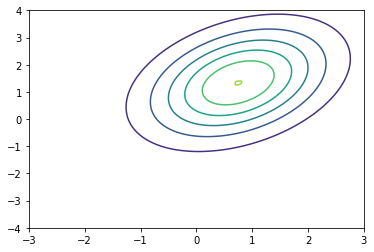

In [20]:
plt.contour(x1s,x2s,pdf_vals)

## Breakout Exercise:
Using the matrix $A$ and variance $\sigma_\epsilon^2$ defined in the following code cell, compute the mean and covariance of $AX + \epsilon$, where $A$ is a matrix, and $\epsilon$ is a vector of Gaussian random variables with mean $0$ and covariance $\sigma_\epsilon^2 I$.
1. Construct the covariance $\sigma_\epsilon^2 I$ (already done).
1. Create a new variable named `sigma2` holding the covariance
1. Create a new variable named `mu2` holding the mean.
1. (Bonus) Construct a function called `GaussianTransform` that returns the transformed mean and covariance.

$$
X\sim N(\mu,\Sigma) \quad \Rightarrow \quad (AX+b)\sim N(A\mu + b, A\Sigma A^T)
$$


$$
Y = AX \sim N(A\mu, A\Sigma A^T)
$$


$$
Y+\epsilon \sim N(A\mu + 0, A\Sigma A^T + \sigma_\epsilon^2 I)
$$

In [23]:
A = np.array([[1.2,1],
              [0.5, 0.1]])

eps_var = 0.1
eps_cov = eps_var*np.eye(2)

mu2 = A@mu
sigma2 = A@sigma@A.T + eps_cov

In [25]:
def GaussianTransform(A, mean, cov, eps_var):
    
    eps_cov = eps_var*np.eye(A.shape[0])

    mu2 = A@mean
    sigma2 = A@cov@A.T + eps_cov
    
    return mu2, sigma2
    

In [24]:
print(mu2)
print(sigma2)

[2.2 0.6]
[[4.74 1.11]
 [1.11 0.42]]


In [28]:
mu3, sigma3 = GaussianTransform(A, mu, sigma, eps_var)
print(mu3)
print(sigma3)

[2.2 0.6]
[[4.74 1.11]
 [1.11 0.42]]


## Read in NSIDC data

In [33]:
df = pd.read_csv('data/N_09_extent_v3.0.csv', sep='\s*,\s*')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [34]:
df.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


In [35]:
print(df.keys())

Index(['year', 'mo', 'data-type', 'region', 'extent', 'area'], dtype='object')


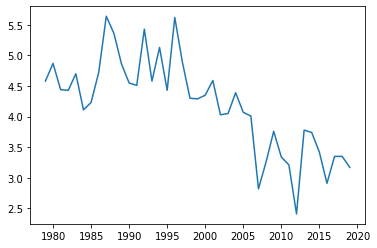

In [37]:
plt.plot(df['year'], df['area'])

### Regression

In [40]:
years = df['year'].to_numpy() - 1979
print(type(years))

<class 'numpy.ndarray'>


In [41]:
print(years)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [42]:
# Build vandermonde matrix
num_years = years.shape[0]
V = np.ones((num_years,2))

V[:,1] = years

print(V)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 32.]
 [ 1. 33.]
 [ 1. 34.]
 [ 1. 35.]
 [ 1. 36.]
 [ 1. 37.]
 [ 1. 38.]
 [ 1. 39.]
 [ 1. 40.]]


$$
f(x|y=\bar{y}) = N\left(\mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(\bar{y}-\mu_y), \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{xy}^T \right)
$$

In [45]:
prior_mu = np.array([4.0, 0])
prior_cov = (4.0**2)*np.eye(2)

In [46]:
print(prior_mu)
print(prior_cov)

[4. 0.]
[[16.  0.]
 [ 0. 16.]]


In [48]:
sigma_xy = prior_cov @ V.T


obs_var = 0.5**2
mu_y, sigma_yy = GaussianTransform(V, prior_mu, prior_cov, obs_var)

In [49]:
y_obs = df['area'].to_numpy()
post_mu = prior_mu + sigma_xy @ np.linalg.solve(sigma_yy, y_obs-mu_y)

In [50]:
print(post_mu)

[ 5.1471265  -0.04801233]


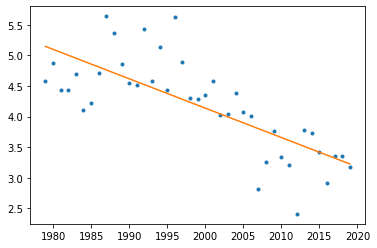

In [53]:
plt.plot(df['year'], y_obs, '.')

pred_y = V@post_mu
plt.plot(df['year'], pred_y)